In [6]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Training Parameters\n",
batch_size = 128
epochs = 1

# loads the MNIST dataset\n",
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns\n",
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras\n",
# We need to add a 4th dimenion to our date thereby changing our\n",
# Our original image shape of (60000,28,28) to (60000,28,28,1)\n",
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image \n",
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type\n",
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)\n",
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs\n",
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix \n",
print ('Number of Classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model\n",
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_______________________________________________

In [7]:
import pickle 

pickle_out = open("MNIST_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

pickle_in = open("MNIST_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.05762428060695529], 'val_acc': [0.9817], 'loss': [0.2552243965506554], 'acc': [0.9217166666666666]}


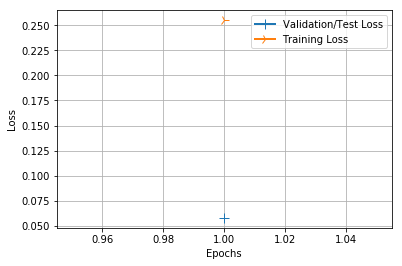

In [8]:
# Plotting our loss charts\n",
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

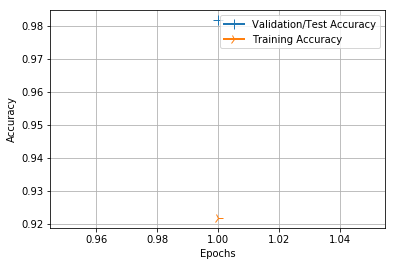

In [9]:
# Plotting our accuracy charts\n",
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.97      0.99      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.99      0.98      0.98       892
          6       0.97      0.99      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.97      0.98      0.97       974
          9       0.97      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000

[[ 968    0    1    0    0    0    7    1    3    0]
 [   0 1119    1    3    0    0    5    0    7    0]
 [   0    2 1008    5    1    0    1    8    7    0]
 [   0    0    3  999    0    2    0    5    1    0]
 [   1    0    2    0  959    0    5    0    2   13]
 [   1    0    0   10    0  874    3    0    2    2]
 [   1    2    0    0    1    4  947    0  

In [11]:
import cv2
import numpy as np
from keras.datasets import mnist

# loads the MNIST dataset\n",
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs\n",
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications\n",
print("Indices of misclassifed data are: \\n\\n" + str(result_indices))

Indices of misclassifed data are: \n\n(array([ 247,  320,  321,  340,  444,  449,  492,  571,  582,  613,  619,
        717,  720,  740,  844,  846,  881,  924,  947,  956, 1014, 1039,
       1062, 1112, 1182, 1191, 1226, 1232, 1247, 1260, 1299, 1326, 1337,
       1393, 1403, 1500, 1522, 1527, 1530, 1549, 1553, 1621, 1681, 1686,
       1709, 1754, 1773, 1878, 1901, 2035, 2040, 2043, 2044, 2070, 2109,
       2118, 2129, 2130, 2135, 2182, 2185, 2266, 2293, 2299, 2369, 2387,
       2414, 2447, 2454, 2488, 2597, 2607, 2654, 2771, 2780, 2810, 2896,
       2921, 2927, 2970, 2990, 2995, 3060, 3073, 3114, 3206, 3289, 3333,
       3503, 3520, 3597, 3718, 3726, 3751, 3767, 3780, 3796, 3808, 3811,
       3818, 3853, 3906, 3941, 3943, 4007, 4065, 4075, 4078, 4163, 4176,
       4205, 4224, 4238, 4248, 4289, 4360, 4497, 4500, 4536, 4571, 4575,
       4601, 4639, 4761, 4783, 4807, 4823, 4860, 4879, 4956, 5067, 5331,
       5634, 5642, 5734, 5887, 5888, 5937, 5955, 5981, 5982, 5997, 6091,
       6157,

In [12]:
import cv2 
#from keras.models import load_model\n",

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')\n",

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    input_im = x_test[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])\n",
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 

    ## Get Prediction\n",
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()